In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import math

In [19]:
import pandas as pd

##############################################################################

def filterinitialset (filename, headername = "vibrational level v\Temperature(K)",  \
    factor = 1.0, normalize = False):

    dfin = pd.read_excel(filename)

    #print(dfin)
    
    dfdict = {}
    
    tempvalues = list(dfin.columns[1:])
    vibvalues = list(dfin[headername].values)

    min = float("inf")
    max = float("-inf")
    for c in dfin.columns:
        dfdict[c] = []
        if c == headername:
            dfdict[c] = list(dfin[c].values)
        else:
            for v in dfin[c].values:
                val = factor*v
                if val > max:
                    max = val
                if val < min:
                    min = val

    for c in dfin.columns:
        if c != headername:
            for v in dfin[c].values:
                val = factor*v
                valp = (val - min) / (max - min)
                if normalize:
                    dfdict[c].append(valp)
                else:
                    dfdict[c].append(val)

    df = pd.DataFrame.from_dict(dfdict)

    return df, vibvalues, tempvalues

##############################################################################

x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

filename = "N2N2_dataset.xls"
df, vib_values , temp_values = filterinitialset (filename)
local_temp_values = temp_values

thefirst = True

maxt = max(local_temp_values)
mint = min(local_temp_values)

for vibidx in range(len(vib_values)-1, len(vib_values)):
    train_x = []
    train_y = []

    maxy = float("-inf")
    miny = float("+inf")

    for idx, t in enumerate(local_temp_values):
        yval = df[t].values[vibidx]

        if yval < miny:
            miny = yval
        elif yval > maxy:
            maxy = yval

    for idx, t in enumerate(local_temp_values):
        tval = (t - mint)/(maxt - mint)
        train_x.append(tval)
    
        yval = df[t].values[vibidx]
        train_y.append((yval - miny)/(maxy - miny))

    if thefirst:
        val_x = train_x.copy()
        val_y = train_y.copy()
        thefirst = False

    minx = min(train_x)
    maxx = max(train_x)

    train_x = np.asarray(train_x).reshape(-1, 1)
    train_y = np.asarray(train_y)

x_data = train_x
y_data = train_y

Data created successfully


In [20]:
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
 dense_19 (Dense)            (None, 64)                128       
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,675
Trainable params: 12,675
Non-trai

In [21]:
model.fit( x_data, y_data, epochs=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4565
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.4183
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3796
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3304
Epoch 5/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2749
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2152
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1572
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0995
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0699
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0666
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0772
Epoch 12/100
3/3 [==============================] - 0s 2ms/step - loss: 0.0749
Epoch 13/100
3/3 [==============================] - 0s 2ms/st

3/3 [==============================] - 0s 2ms/step


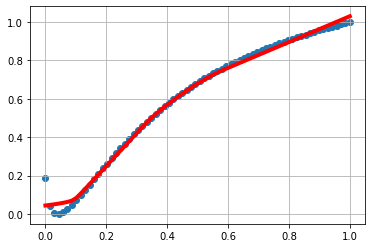

In [22]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()